In [1]:
import pandas as pd
import numpy as np
import pybaseball as baseball
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [22]:
#get batting data
d = baseball.fg_batting_data(start_season=2023)

In [23]:
#only include where ab is within 2 st devs from mean (remove players AB low)
def MinReqAB(dataset):
    minABRequirement = np.average(dataset.AB)-np.std(dataset.AB)*2
    meetsRequirement = dataset['AB'] >= minABRequirement
    return dataset[meetsRequirement]
d = MinReqAB(d)

In [68]:
def BattingStat(getStat, getTeam):
    """
    nameStatistic statistic to pull
    BA, SLG, OBP
    """
    if getStat == 'BA':
        nameStatistic = 'Batting_Average'

        d[nameStatistic]=d["H"] / d["AB"]

    if getStat == 'SLG':
        nameStatistic = 'Slugging_Percentage'
        d[nameStatistic] = d[getStat]
    
    if getStat == 'OBP':
        nameStatistic='On_Base_Percentage'
        d[nameStatistic] = d[getStat]
    #ranked batting average
    d[nameStatistic + '_RankPercentage'] = d[nameStatistic].rank()/d[nameStatistic].count()

    Team = d[d['Team'] == getTeam]
    
    
#plot default
    #set plot size
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    #set white and remove grid
    sns.set_style("whitegrid", {'axes.grid' : False})
    palette = itertools.cycle(sns.color_palette())


    for index, players in Team.iterrows():
        ax = sns.histplot(d[nameStatistic], stat='probability', color='black', alpha = .2, kde=True)
        ax.containers[0].remove() # remove the bars
        ax.axvline(players[nameStatistic], label = players['Name'], color=next(palette))
        ax.set(xlabel=nameStatistic, ylabel='Frequency')
        ax.legend()
    print(Team[['Name', nameStatistic, nameStatistic + '_RankPercentage']])

               Name  On_Base_Percentage  On_Base_Percentage_RankPercentage
10      Kyle Tucker               0.380                           0.938776
70     Alex Bregman               0.343                           0.697279
130     Jeremy Pena               0.292                           0.091837
132  Mauricio Dubon               0.296                           0.129252
141      Jose Abreu               0.290                           0.064626


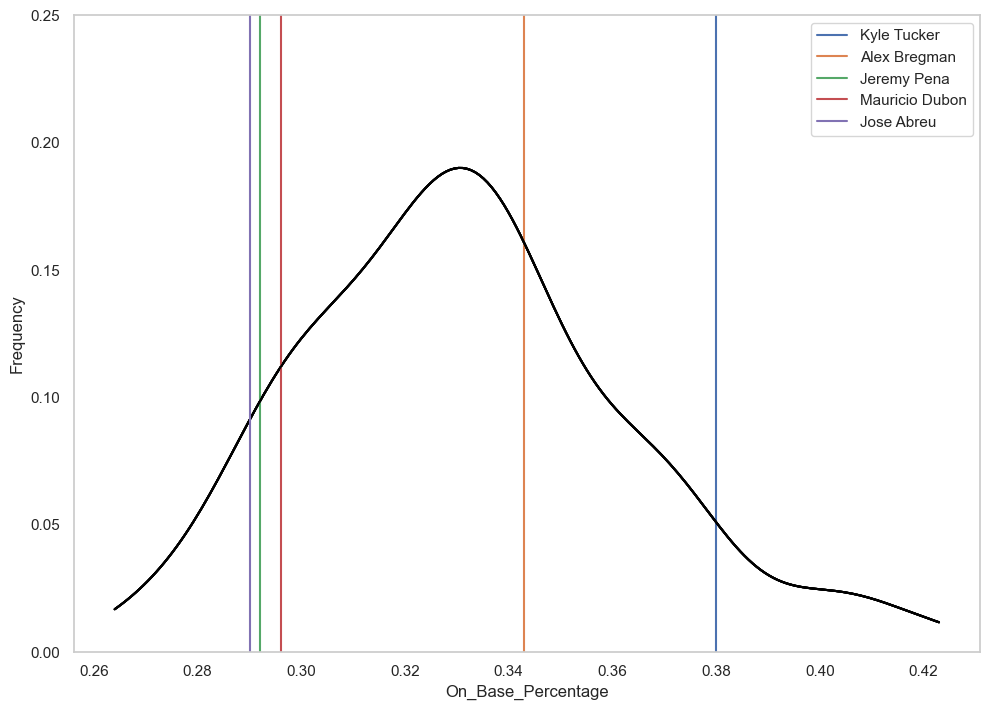

In [70]:
BattingStat("OBP", "HOU")